## Electric Vehicle Charging Stations in India

Electric Vehicle (EV) charging infrastructure in India has been expanding rapidly in recent years, driven by the government's push towards electrification and the growing adoption of EVs. 

## Problem Statement 

Our Electric Vehicle Startup is at a critical juncture where we need to decide the target market segment for our EVs in India. Given the diverse demographics, infrastructure challenges, and evolving consumer preferences, we must conduct a segmentation analysis of the Indian Electric Vehicle market to identify the most promising segments that are likely to embrace electric mobility. This analysis will guide us in formulating a feasible market entry strategy that maximizes our chances of success and market penetration.

## Collecting Data

* The data set contains Geographic information of the Electric vehicle charging stations in India. 
* This dataset provides information about electric vehicle (EV) charging stations in India. Here's an overview of the dataset columns and what each column represents:

* Name: The name of the charging station.
* State: The state in which the charging station is located.
* City: The city in which the charging station is situated.
* Address: The specific address or location of the charging station.
* Latitude: The latitude coordinates of the charging station's location.
* Longitude: The longitude coordinates of the charging station's location.
* Type: The type of charging station, which could indicate the charging technology or power rating (e.g., DC charging station).

## Exploring Data

In [1]:
## importing the libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from bioinfokit.visuz import cluster

from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv('ev-charging-stations-india.csv')
df.head(5)

name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751    76.2760   
3  Fun and Food Carnival, NH 58, Khatauli Bypass,...   29.3105    77.7218   
4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   29.3105    77.7218   

   type  
0  12.0  
1  12.0  
2  12.0  
3  12.0  
4  12.0

In [96]:
df.shape ## there are 7 columns and 1547 rows

(1547, 7)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [98]:
## Covert the datatype of lattitude
df['lattitude']=df['lattitude'].str.rstrip(',').astype(float)

Numerical Columns:

In [99]:
num=df.select_dtypes(np.number).columns.tolist()
num

['lattitude', 'longitude', 'type']

Categorical Columns:

In [100]:
cat=df.select_dtypes(object).columns.tolist()
cat

['name', 'state', 'city', 'address']

## Inference

The dataset contains 7 columns and 1547 rows with the information on geographic including name,state , city ,address, lattitude,longitude and type.

## Descriptive Statistics

Here in this we could see the Common descriptive statistics include measures such as mean, median, mode, standard deviation, variance, range, and percentiles.

In [101]:
df[num].describe()

lattitude     longitude         type
count  1541.000000  1.541000e+03  1539.000000
mean     19.979926  1.105323e+05     9.020793
std       7.125371  3.064996e+06     4.136436
min       8.390198  8.058454e+00     6.000000
25%      13.041390  7.562036e+01     7.000000
50%      19.106317  7.721257e+01     7.000000
75%      26.900894  7.847983e+01    11.000000
max      78.065400  8.510551e+07    24.000000

In [102]:
df[cat].describe()

name        state   city  \
count          1547         1547   1547   
unique         1144           60    362   
top     Tata Power   Maharashtra  Delhi   
freq             58          259     72   

                                                  address  
count                                                1507  
unique                                               1180  
top     Outside Chelmsford Club/ Opposite CSIR Buildin...  
freq                                                    6

## Univariant Analysis

## Numeric

In [103]:
df[num].skew()

lattitude     1.081925
longitude    27.730814
type          1.853574
dtype: float64

The variables are positively skewed . most locations are clustered around a certain latitude, with fewer locations scattered towards higher latitudes.most locations are tightly clustered around a specific longitude, with very few locations spread out over a wide range of longitudes.

In [104]:
df[num].kurt()

lattitude      6.730656
longitude    767.994799
type           2.698176
dtype: float64

kurtosis value greater than 3 indicates leptokurtic behavior, meaning the distribution of latitude values has heavier tails compared to a normal distribution.Clusters of locations with similar latitudes, but some locations may have significantly higher or lower latitudes, leading to the heavier tails.

## Rounding the values of Latitude and Longitude

In [105]:
df['lattitude']=df['lattitude'].round(5)
df['longitude']=df['longitude'].round(5)

## visualize the distribution of all the numerical columns 

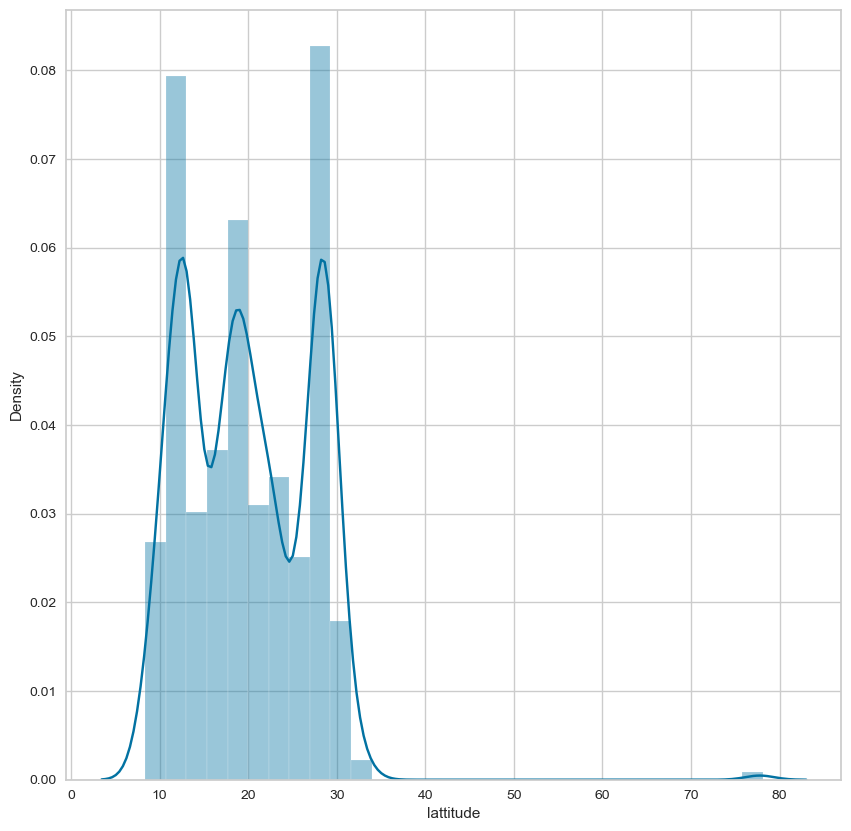

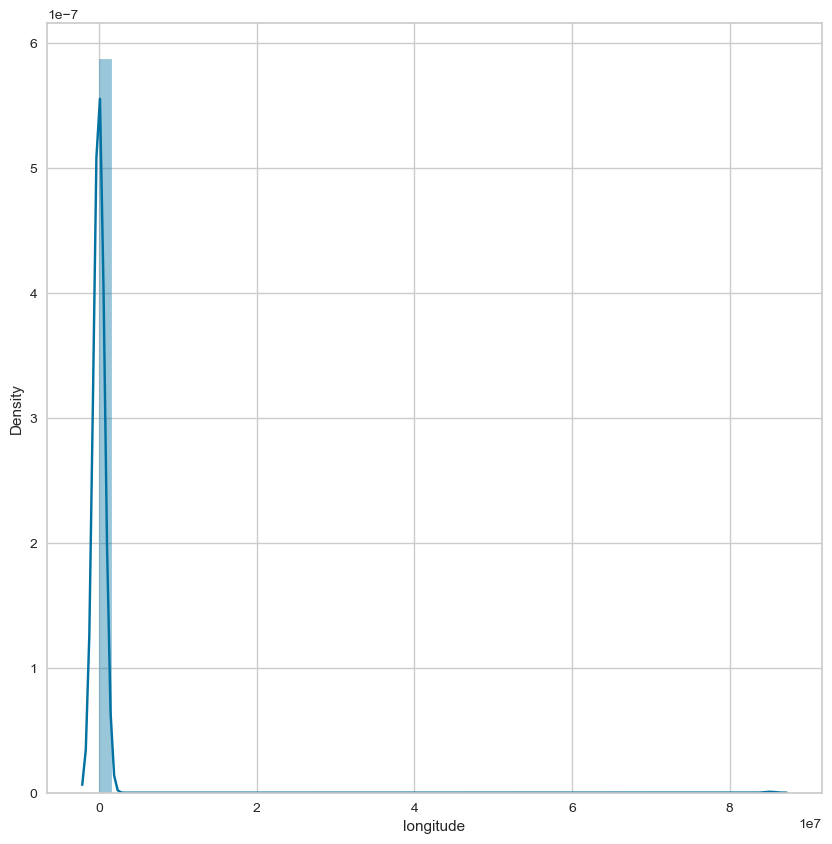

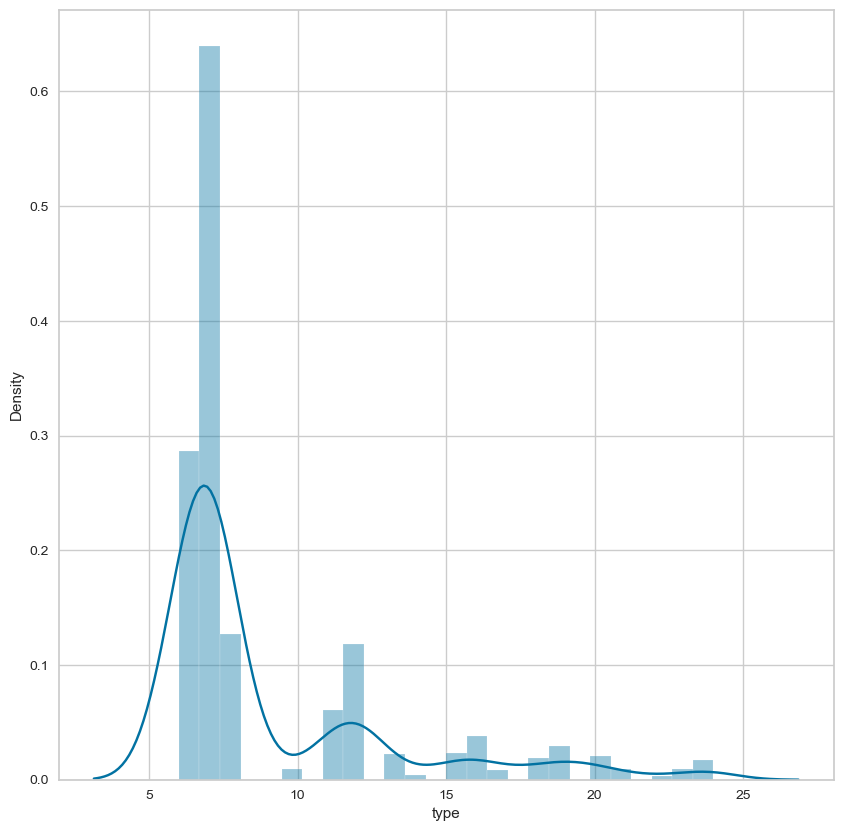

In [106]:
for i in num:
    sns.distplot(df[i])
    plt.show()

## Outliers

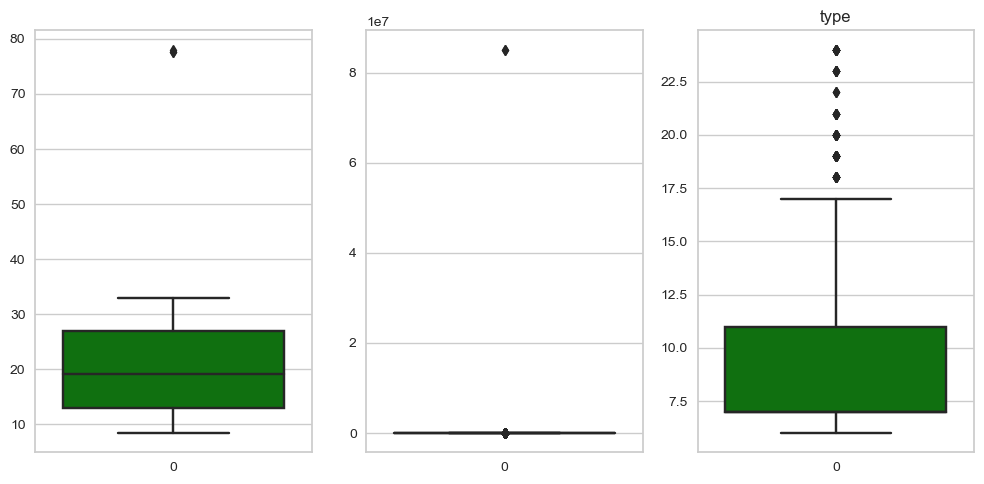

In [107]:
fig,ax=plt.subplots(1,3 , figsize=(10,5))

for i ,subplot in zip(df[num],ax.flatten()):
    sns.boxplot(df[i],ax=subplot,color='green')
    plt.title(i)
plt.tight_layout()    
plt.show()

In [108]:
num1=['lattitude','longitude']

In [109]:
# Outlier Treatment

q1 = df[num1].quantile(0.25)
q2 = df[num1].quantile(0.50)
q3 = df[num1].quantile(0.75)

iqr = q3 - q1

ul = q3 + (1.5 * iqr)

ll = q1 - (1.5 * iqr)

df=df[~(((df[num1] < (ll)) | (df[num1] > (ul))).any(axis=1))]

In [110]:
df.shape

(1393, 7)

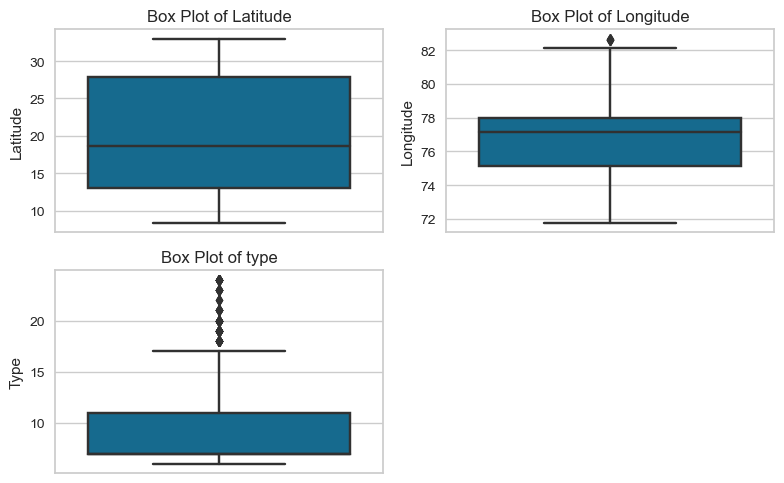

In [111]:
##Check for outliers in latitude and longitude columns

plt.figure(figsize=(8, 5))

# Box plot for Latitude
plt.subplot(2, 2, 1)
sns.boxplot(data=df, y='lattitude')
plt.ylabel('Latitude')
plt.title('Box Plot of Latitude')

# Box plot for Longitude
plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='longitude')
plt.ylabel('Longitude')
plt.title('Box Plot of Longitude')

# Box plot for Longitude
plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='type')
plt.ylabel('Type')
plt.title('Box Plot of type')


plt.tight_layout()
plt.show()

## Inference 

We could see the outliers mainly in lattitude and longitude.I am going to remove the outliers since to main the data integrity.

## Categorical

 * Standardizing state names

In [112]:
df['state'].value_counts()

state
Maharashtra          253
Tamil Nadu           155
Karnataka            132
Delhi                122
Kerala                90
Uttar Pradesh         84
Telangana             75
Gujarat               67
Rajasthan             66
Haryana               60
Delhi NCR             53
Andhra Pradesh        26
Andhra pradesh        23
Uttarakhand           20
TAMIL NADU            20
Madhya Pradesh        18
Punjab                13
Chhattisgarh          11
West Bengal           11
PUNJAB                 9
Goa                    8
TamilNadu              7
Himachal Pradesh       6
Odisha                 6
TELENGANA              5
Maharashra             5
Chattisgarh            4
Jharkhand              4
Bihar                  3
Jammu                  3
WestBengal             3
Jammu & Kashmir        3
Chandigarh             2
Andra Pradesh          2
chattisgarh            2
Puducherry             2
Uttarakhand            2
Uttrakhand             2
Hyderabad              1
Rajahmundry        

In [113]:
import pandas as pd
from difflib import get_close_matches

def standardize_states(df):
    
    df['state'] = df['state'].str.lower().str.strip()
    
    state_dict = {}
    
    for state in df['state']:
        if state in state_dict:
            continue  
        close_matches = get_close_matches(state, state_dict.keys(), n=1, cutoff=0.8)
        
        if close_matches:
            state_dict[state] = state_dict[close_matches[0]]
        else:
            state_dict[state] = state.title()

    df['state'] = df['state'].map(state_dict)
    
standardize_states(df)

In [114]:
df['state'] = df['state'].replace('Jammu And Kashmir','Jammu')
df['state'] = df['state'].replace('Delhi Ncr','Delhi')
df['state'] = df['state'].replace('Hyderabadu00A0','Hyderabad')

In [115]:
df['state'].value_counts()

state
Maharashtra         258
Tamil Nadu          183
Delhi               175
Karnataka           132
Kerala               91
Uttar Pradesh        84
Telangana            80
Andhrapradesh        71
Gujarat              67
Rajasthan            66
Haryana              61
Uttarakhand          25
Punjab               22
Chhattisgarh         17
Westbengal           14
Goa                   8
Jammu                 7
Odisha                6
Himachal Pradesh      6
Jharkhand             4
Bihar                 3
Chandigarh            2
Hyderabad             2
Puducherry            2
Hisar                 1
Limbdi                1
Kochi                 1
Pondicherry           1
Ernakulam             1
Chikhali              1
Rajahmundry           1
Name: count, dtype: int64

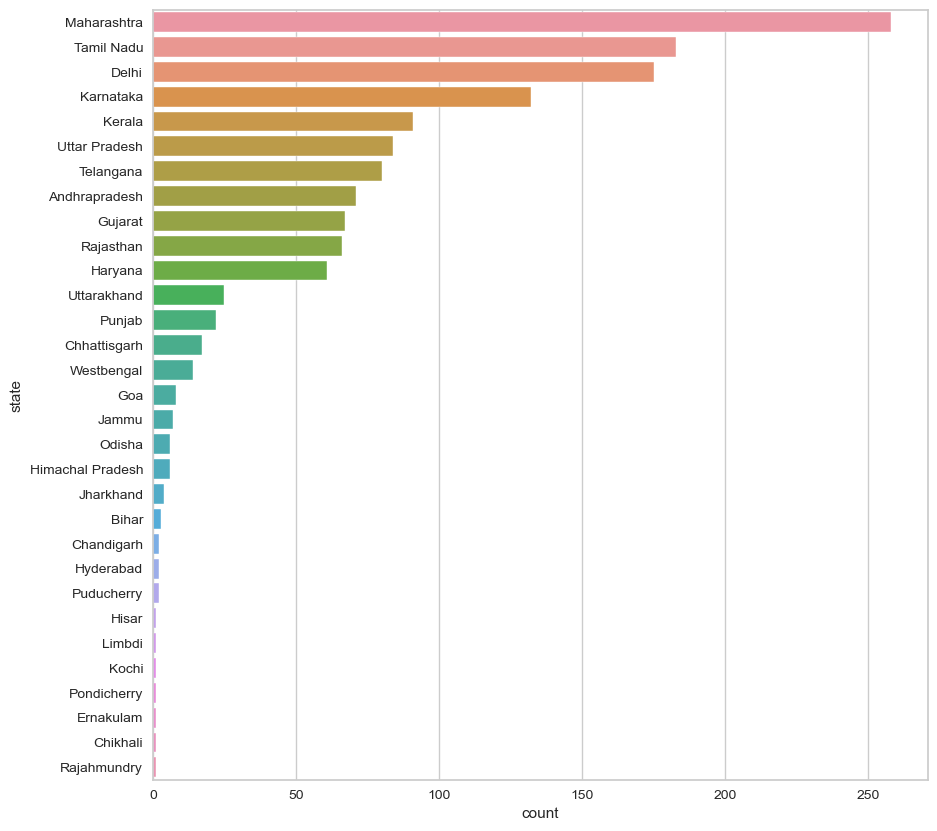

In [116]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['state'],order=df['state'].value_counts().index)
plt.show()

## Inference

* Maharastra has more than 250 charging stations
* Followed by Tamil nadu and Delhi has around 150 to 200 charging sations
* Union territories have the least charging station (less than 50 in number)
* Chikhali , Rajahmundry has very less charging station below 10

In [117]:
## Standardizing city names
df['city'].unique()

array(['Gurugram', 'Behror', 'Khatauli', 'Una', 'Kasauli', 'Karnal',
       'karnal', 'Darbaripur', 'Pune', 'New Delhi', 'Mettupalayam',
       'Khopoli', 'Dehradun', 'Ahmedabad', 'Lonavla', 'Kukas', 'Pushkar',
       'Gurgaon', 'Meerut', 'Mira Bhayandar', 'Secunderabad', 'Mumbai',
       'Dindori', 'Sangli', 'Marunji', 'Saharanpur', 'Shela', 'Gajraula',
       'Beawar Khas', 'Bengaluru', 'Metikuppe', 'Haridwar', 'Mahad',
       'Thane', 'Natt', 'Vadodara', 'Coimbatore', 'Bhimtal', 'Nagaon',
       'Pimpri-Chinchwad', 'Vasai-Virar', 'Greater Noida', 'Jaipur',
       'Nashik', 'Shirdi', 'Dhule', 'Dahanu', 'Talegaon Dabhade', 'Katra',
       'HYDERBAD', 'Sirsa', 'Noida', 'Shahpura', 'Shabhad', 'Bhadalwadi',
       'Alwar', 'Kosi Kalan', 'Kotwan', 'Shivamogga', 'Karadagodu',
       'Karkala', 'Surathkal', 'Kaup', 'Bramavara', 'Kundapura',
       'Manipal', 'Chikkamagaluru', 'Mudbidri', 'bengaluru', 'pune',
       'chennai', 'hyderabad', 'delhi', 'ahmedabad', 'kochi', 'mumbai',
       'cal

In [118]:
df['city']=df['city'].apply(lambda x : x.capitalize())

In [119]:
## Mapping dictionary
city_map={
    'Gurgaon':['Gurugram','gurugram','Gurgaon'],
    'Banglore':['Bengaluru','Bangalore','Banglore'],
    'New Delhi':['New Delhi','Delhi','delhi','NEW DELHI','New delhi'],
    'Trichy':['TRICHY','Trichy','Tiruchirappalli'],
    'Pondicherry':['Pondicherry','Puducherry'],
    'Hyderabad':['Hyderabad','HYDERBAD','Hyderbad']
}

# fuction to map cities
def map_cities(city):
    for key,values in city_map.items():
        if city in values:
            return key
    return city

df['city']=df['city'].apply(map_cities)

In [120]:
df['city'].value_counts()

city
New Delhi           155
Banglore            111
Chennai              78
Mumbai               70
Hyderabad            65
                   ... 
Talegaon dabhade      1
Katra                 1
Sirsa                 1
Shabhad               1
Pathanamthitta        1
Name: count, Length: 261, dtype: int64

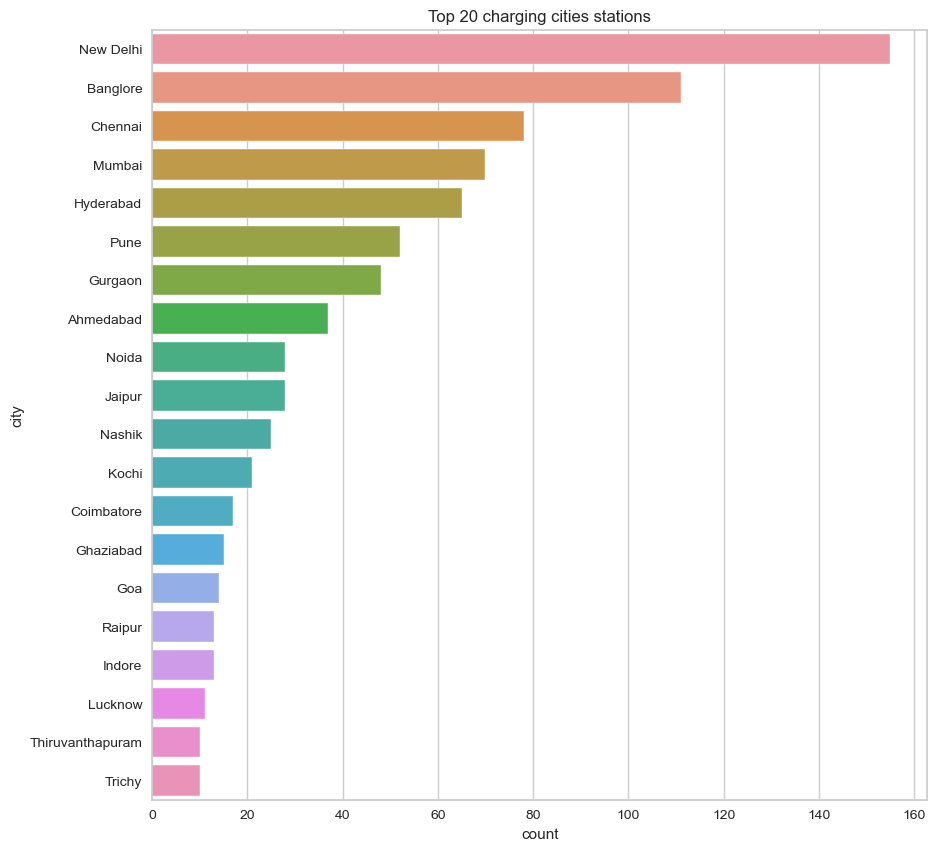

In [121]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['city'],order=df['city'].value_counts().index[:20])
plt.title('Top 20 charging cities stations')
plt.show()

## Inference

* New Delhi has 150 charging stations.
* Followed by Chennai and Bangalore has around 100 to 120 charging sations
* Other metropolitan cities in india like Surat have the least charging station (less than 10 in number)
* Cities like villipuram , other parts of south Tamil nadu has less stations for charging .


## Creating a new column as charge type

In [122]:
# Deriving the charge type
def create_charging_type(name):
    if 'AC' in name:
        return 'AC'
    elif 'DC' in name:
        return 'DC'
    else:
        return 'Not Mentioned'
    
df['charge_type'] =df['name'].apply(create_charging_type)

In [123]:
df['charge_type'].value_counts()

charge_type
Not Mentioned    1298
DC                 65
AC                 30
Name: count, dtype: int64

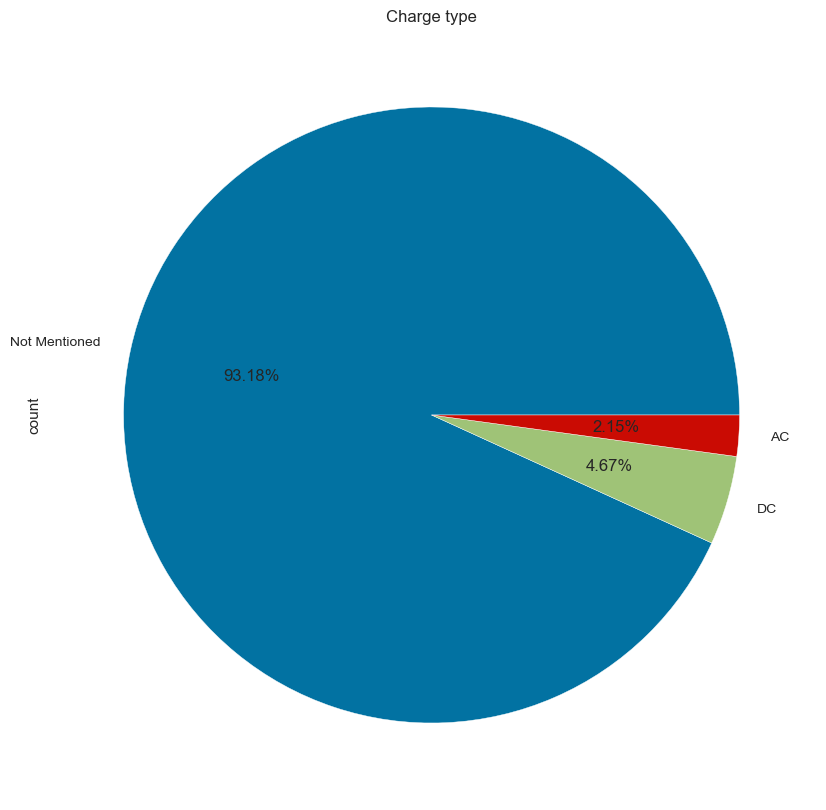

In [125]:
df['charge_type'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Charge type')
plt.show()

## Inference

* Only 2 % of charging stations are AC station mentioned
* Only 4.20 % of charging stations are DC station mentioned
* About 93.79% where charge type has not mentioned 

In [126]:
df.head(2)

name    state     city  \
0  Neelkanth Star DC Charging Station  Haryana  Gurgaon   
1        Galleria DC Charging Station  Haryana  Gurgaon   

                                             address  lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...    29.6019    76.9803   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022    28.4673    77.0818   

   type charge_type  
0  12.0          DC  
1  12.0          DC

## Checking Null values

In [127]:
df.isnull().sum()

name            0
state           0
city            0
address        39
lattitude       6
longitude       6
type            8
charge_type     0
dtype: int64

In [128]:
## Dropping the null value rows  in longitude ,latitude and type column 
df= df.dropna(subset=['longitude','lattitude','type'])

## Fill null addresses based on state and city information
df['address'] = df.apply(lambda row: f"{row['city']}, {row['state']} Address" if pd.isnull(row['address']) else row['address'], axis=1)

In [129]:
df.isnull().sum()

name           0
state          0
city           0
address        0
lattitude      0
longitude      0
type           0
charge_type    0
dtype: int64

* Dropping the null value rows  in longitude ,latitude and type column
* Fill null addresses based on state and city information


In [130]:
df.shape

(1379, 8)

## Checking the Duplicates

In [131]:
duplicate_rows = df.duplicated()

num_duplicates = duplicate_rows.sum()

duplicate_data = df[duplicate_rows]
print("Duplicate rows:")
print(duplicate_data)

Duplicate rows:
                                                name          state  \
555                            Oberoi Mall, Goregaon    Maharashtra   
579   The Grand Legacy, Panchgani-Mahabaleshwar Road    Maharashtra   
830                          EESL High court station     Tamil Nadu   
832                        EESL Chennai Egmore metro     Tamil Nadu   
837                             EESL Chelmsford Club          Delhi   
...                                              ...            ...   
1416                         Pacific Mall, Sahibabad  Uttar Pradesh   
1424                Devarana, Delhi-Dehradun Highway  Uttar Pradesh   
1430                       Pacific Mall, Rajpur Road    Uttarakhand   
1455                             Magenta TTC, Turbhe    Maharashtra   
1458                             Magenta TTC, Turbhe    Maharashtra   

               city                                            address  \
555          Mumbai  Western Express Hwy, Yashodham, Gore

In [132]:
## Removing the duplicate rows
df=df.drop_duplicates()

In [133]:
df.shape

(1166, 8)

## Bivariant Analysis

## State  Vs City

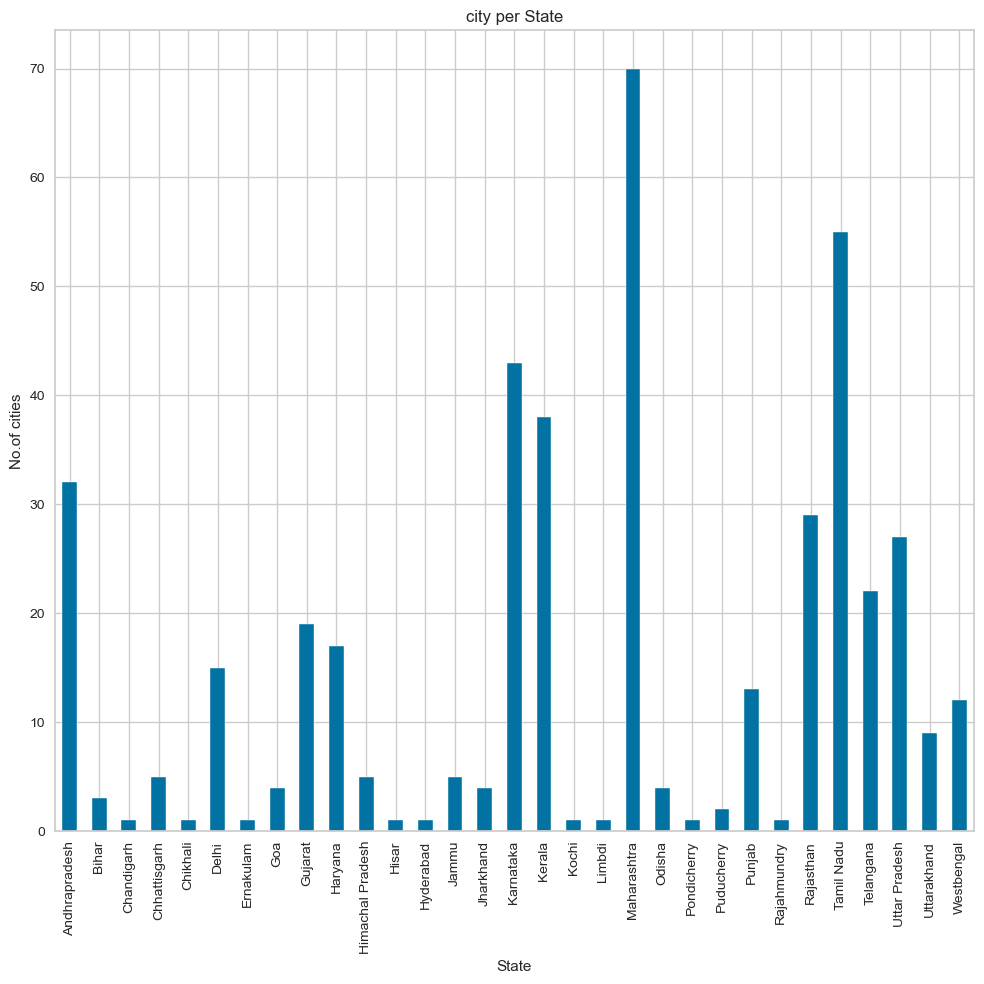

In [134]:
state_city_counts = df.groupby('state')['city'].nunique()

plt.figure(figsize=(10,10))
state_city_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('No.of cities')
plt.title('city per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Inference

* Analysing the State column , it's evident that Maharashtra has the highest count of EV charging stations , thus follwed by Delhi.
* Tamil nadu and Karnataka also have 2nd highest count of EV charging stations .
* Most of the charging stations are within the states of Maharashtra , Delhi , Tamil nadu , Karnataka and Kerala in India.
* In cities , Delhi exhibits the highest number of EV charging stations followed by Bangalore , Chennai , Mumbai and Hyderabad.

## Type Vs State

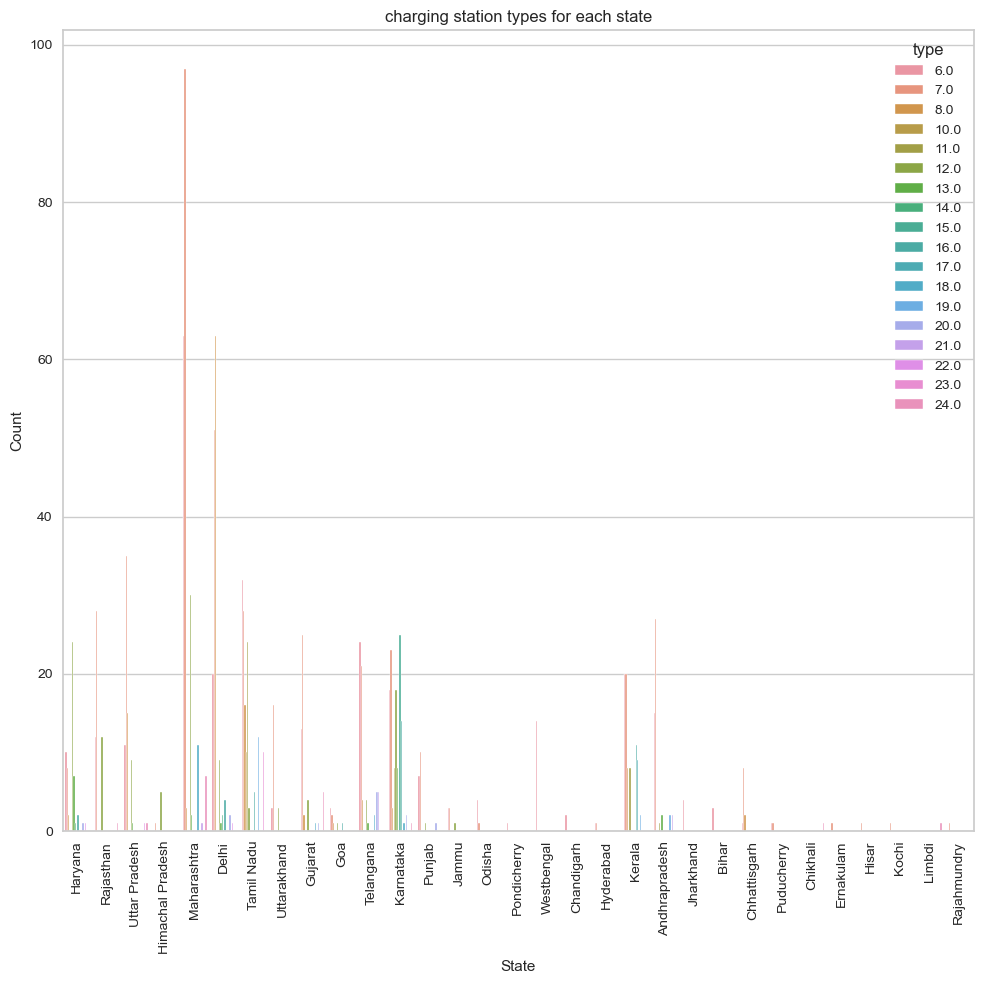

In [135]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='state', hue='type')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('charging station types for each state')
plt.tight_layout()
plt.show()

## Inference

* In India 7 kWh EV charging stations are highly present.
* After 7 kWh , there are 6,8, and 12 KWh EV stations are significantly seen.

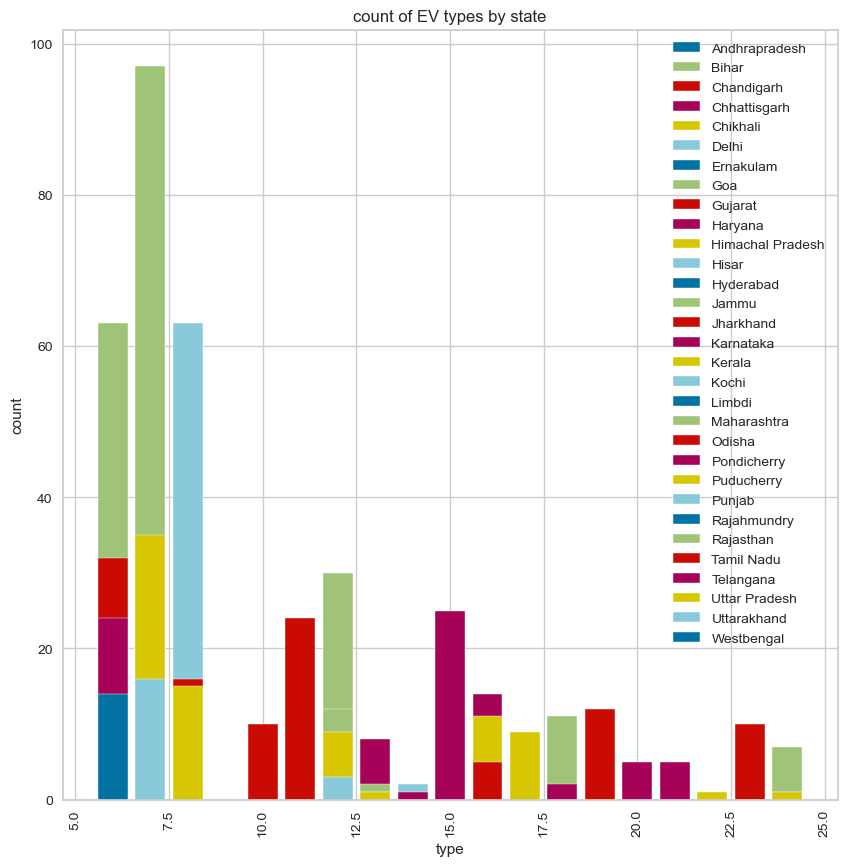

In [137]:
## grouping data by state and type , counting each type in each group
group_data = df.groupby(['state','type']).size().reset_index(name='count')

plt.figure(figsize=(10,10))

for state,group in group_data.groupby('state'):
    plt.bar(group['type'],group['count'],label=state)
    
plt.xlabel('type')    
plt.ylabel('count')
plt.title('count of EV types by state')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Inference

* In Maharashtra , the majority of charging stations type are 6 and 7 KWh charging capacity.
* In Gujarat , Tamil nadu , Kerala thecharging stations capacity is about 10, 11 and 19 KWh.
* Telangana and Haryana offeres 20,21 KWh of charging capcities.
* Karnataka and Rajasthan provide with 15 KWh of power capcity

## Geographical Map of EV charging stations

In [43]:
import folium
map_obj = folium.Map(location=[df['lattitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add markers with names as labels
for _, row in df.iterrows():
    folium.Marker(
        location=[row['lattitude'], row['longitude']],
        popup=f"<b>Type:</b> {row['type']}<br><b>Name:</b> {row['name']}",
        tooltip=row['name'],  # Label the marker with the name of the place
    ).add_to(map_obj)

# Save the map as an HTML file
map_obj.save('EV_charging_station_map.html')

# Display the map
map_obj

In [ ]:
* There is no significant EV charging states in the Eastern part of India.

## Encoding

In [138]:
categorical_columns = ['state', 'city', 'charge_type']

df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype=int)

In [139]:
df = df_encoded.drop(['name','address'],axis=1)

In [140]:
df.head(2)

lattitude  longitude  type  state_Andhrapradesh  state_Bihar  \
0    29.6019    76.9803  12.0                    0            0   
1    28.4673    77.0818  12.0                    0            0   

   state_Chandigarh  state_Chhattisgarh  state_Chikhali  state_Delhi  \
0                 0                   0               0            0   
1                 0                   0               0            0   

   state_Ernakulam  ...  city_Vellore  city_Vijayawada  city_Villupuram  \
0                0  ...             0                0                0   
1                0  ...             0                0                0   

   city_Visakhapatnam  city_Walayar  city_Yediyur  city_Yelur  charge_type_AC  \
0                   0             0             0           0               0   
1                   0             0             0           0               0   

   charge_type_DC  charge_type_Not Mentioned  
0               1                          0  
1               1                          0  

[2 rows x 295 columns]

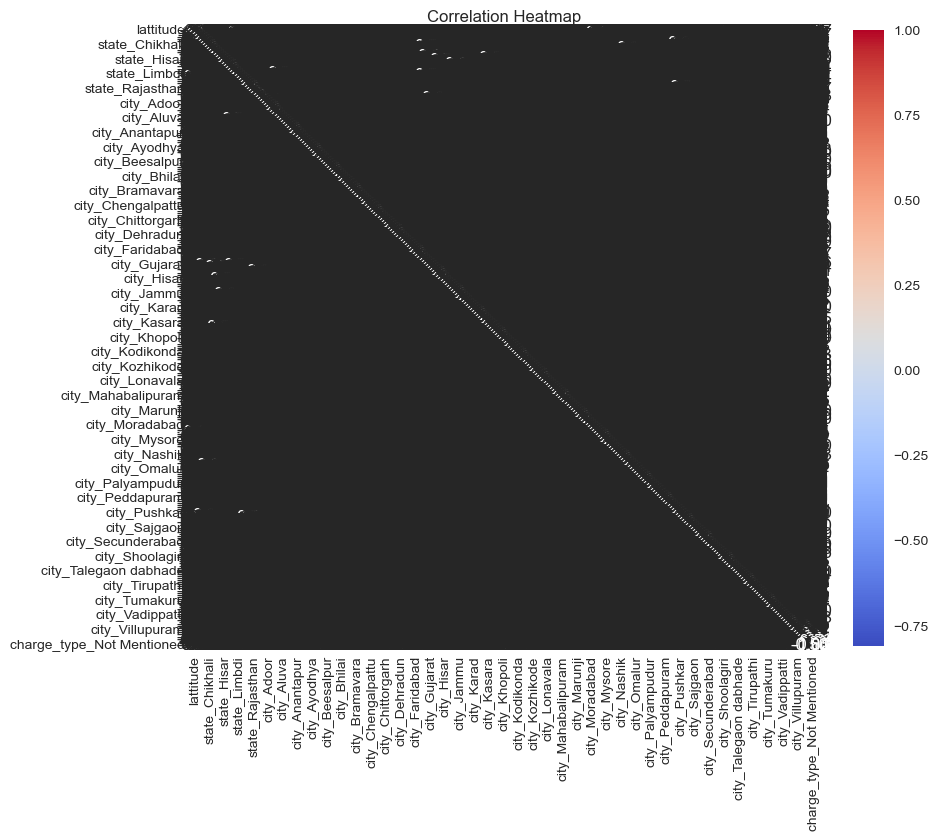

In [141]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

There is no multicollinearity between the independent variables.
thus there is no need of Principle component analysis.

In [142]:
from sklearn.preprocessing import StandardScaler

df_scaled=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [143]:
pca = PCA()
pca.fit(df_scaled)
data_pca = pca.transform(df_scaled)

In [144]:
pf = pd.DataFrame(data = data_pca, columns = [f"PC{i+1}" for i in range(df_scaled.shape[1])])

In [145]:
pc = pd.DataFrame(pca.components_.round(2),index = [f"PC{i+1}" for i in range(df_scaled.shape[1])],columns=list(df_scaled.columns))
pc

lattitude  longitude  type  state_Andhrapradesh  state_Bihar  \
PC1         0.43      -0.21  0.01                -0.08        -0.00   
PC2        -0.34      -0.24  0.22                -0.06        -0.01   
PC3        -0.03       0.47  0.17                 0.04        -0.03   
PC4         0.02      -0.04  0.28                -0.11        -0.00   
PC5         0.07       0.01 -0.01                 0.09        -0.02   
...          ...        ...   ...                  ...          ...   
PC291       0.63       0.37  0.00                 0.01         0.00   
PC292       0.00      -0.00  0.00                 0.16         0.04   
PC293       0.00      -0.00 -0.00                -0.01        -0.00   
PC294       0.00      -0.00  0.00                -0.11        -0.03   
PC295      -0.00      -0.00  0.00                -0.08        -0.02   

       state_Chandigarh  state_Chhattisgarh  state_Chikhali  state_Delhi  \
PC1               -0.03               -0.05            0.01         0.14   
PC2               -0.01               -0.10            0.04        -0.37   
PC3                0.03                0.12           -0.02        -0.05   
PC4               -0.01               -0.13            0.36         0.27   
PC5               -0.00                0.12            0.29        -0.34   
...                 ...                 ...             ...          ...   
PC291              0.00                0.00            0.01         0.00   
PC292              0.03                0.08            0.12         0.27   
PC293             -0.00               -0.01            0.22        -0.02   
PC294             -0.02               -0.05           -0.16        -0.18   
PC295             -0.02               -0.04            0.40        -0.13   

       state_Ernakulam  ...  city_Vellore  city_Vijayawada  city_Villupuram  \
PC1              -0.02  ...         -0.03            -0.02            -0.05   
PC2               0.01  ...          0.01            -0.03             0.02   
PC3              -0.01  ...          0.03             0.02             0.06   
PC4              -0.01  ...          0.02            -0.03             0.04   
PC5              -0.01  ...         -0.01             0.01            -0.01   
...                ...  ...           ...              ...              ...   
PC291            -0.00  ...          0.01            -0.03             0.01   
PC292             0.02  ...         -0.01            -0.01            -0.01   
PC293            -0.00  ...          0.04             0.06             0.06   
PC294            -0.02  ...         -0.00            -0.01            -0.01   
PC295            -0.01  ...         -0.02            -0.03            -0.03   

       city_Visakhapatnam  city_Walayar  city_Yediyur  city_Yelur  \
PC1                 -0.02         -0.03         -0.02        0.00   
PC2                 -0.01          0.01          0.02        0.01   
PC3                  0.03          0.01          0.01       -0.03   
PC4                 -0.00          0.01          0.01       -0.01   
PC5                  0.01         -0.01         -0.01        0.00   
...                   ...           ...           ...         ...   
PC291               -0.02          0.03          0.02        0.02   
PC292               -0.01         -0.01         -0.01       -0.01   
PC293                0.03          0.04          0.04        0.03   
PC294               -0.00         -0.00         -0.00       -0.00   
PC295               -0.01         -0.02         -0.02       -0.01   

       charge_type_AC  charge_type_DC  charge_type_Not Mentioned  
PC1              0.23            0.27                      -0.37  
PC2              0.12            0.24                      -0.27  
PC3              0.14            0.23                      -0.27  
PC4              0.00           -0.05                       0.04  
PC5             -0.02           -0.04                       0.05  
...               ...             ...                        

* In Principal Component Analysis (PCA), loadings represent the weights or coefficients associated with 
* Each original feature in a particular principal component (PC). 
* They essentially tell how much each original feature contributes to the formation of that specific PC.

In [146]:
print("Principal Component Summary:\n")
print(pd.DataFrame({
    "Standard deviation": pca.explained_variance_.round(2),
    "Proportion of Variance": pca.explained_variance_ratio_.round(2),
    "Cumulative variance Ratio": pca.explained_variance_ratio_.cumsum().round(2)
}, index=[f"PC{i+1}" for i in range(df_scaled.shape[1])]))

Principal Component Summary:

       Standard deviation  Proportion of Variance  Cumulative variance Ratio
PC1                  3.19                    0.01                       0.01
PC2                  2.74                    0.01                       0.02
PC3                  2.59                    0.01                       0.03
PC4                  2.09                    0.01                       0.04
PC5                  2.01                    0.01                       0.04
...                   ...                     ...                        ...
PC291                0.00                    0.00                       1.00
PC292                0.00                    0.00                       1.00
PC293                0.00                    0.00                       1.00
PC294                0.00                    0.00                       1.00
PC295                0.00                    0.00                       1.00

[295 rows x 3 columns]


In [147]:
pca.explained_variance_ratio_

array([1.08022205e-02, 9.28739598e-03, 8.78174251e-03, 7.08524044e-03,
       6.79552900e-03, 6.61955123e-03, 6.59598853e-03, 6.43785420e-03,
       6.40469311e-03, 6.36719106e-03, 6.34301958e-03, 6.28306439e-03,
       6.24706638e-03, 6.16022728e-03, 6.06911878e-03, 6.01386700e-03,
       5.82363041e-03, 5.76759590e-03, 5.72348208e-03, 5.52207526e-03,
       5.31029153e-03, 5.28239758e-03, 5.02098974e-03, 4.89737260e-03,
       4.58656237e-03, 4.47727832e-03, 4.29977869e-03, 4.23200827e-03,
       4.07641162e-03, 3.86319256e-03, 3.76284354e-03, 3.66602386e-03,
       3.55288503e-03, 3.50990867e-03, 3.48972518e-03, 3.44990881e-03,
       3.44703900e-03, 3.44483817e-03, 3.43958239e-03, 3.43405491e-03,
       3.42304142e-03, 3.42092039e-03, 3.41811586e-03, 3.41754558e-03,
       3.41495771e-03, 3.41350043e-03, 3.41258205e-03, 3.41122026e-03,
       3.41097093e-03, 3.41061631e-03, 3.40990397e-03, 3.40784469e-03,
       3.40749208e-03, 3.40665127e-03, 3.40601980e-03, 3.40433896e-03,
      

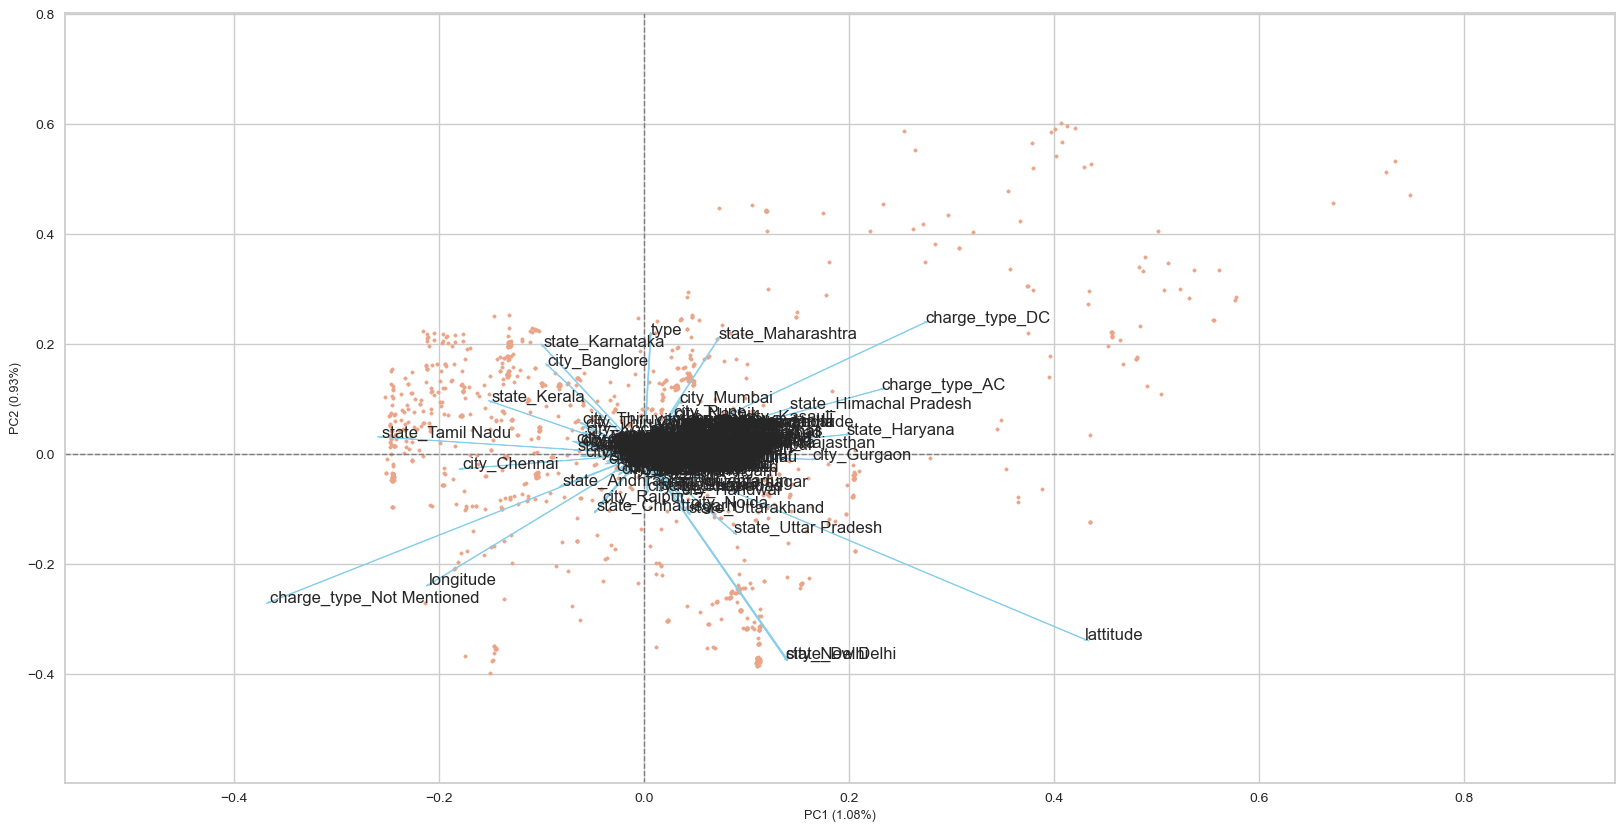

In [148]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore= data_pca, loadings= pca.components_, labels=df_scaled.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(20,10))

## Inference

* Thus the plot shows that the state Maharashtra , city Delhi , charge_type DC has the highest importance and high variance.

In [149]:
cumlative_variance= pca.explained_variance_ratio_.cumsum()

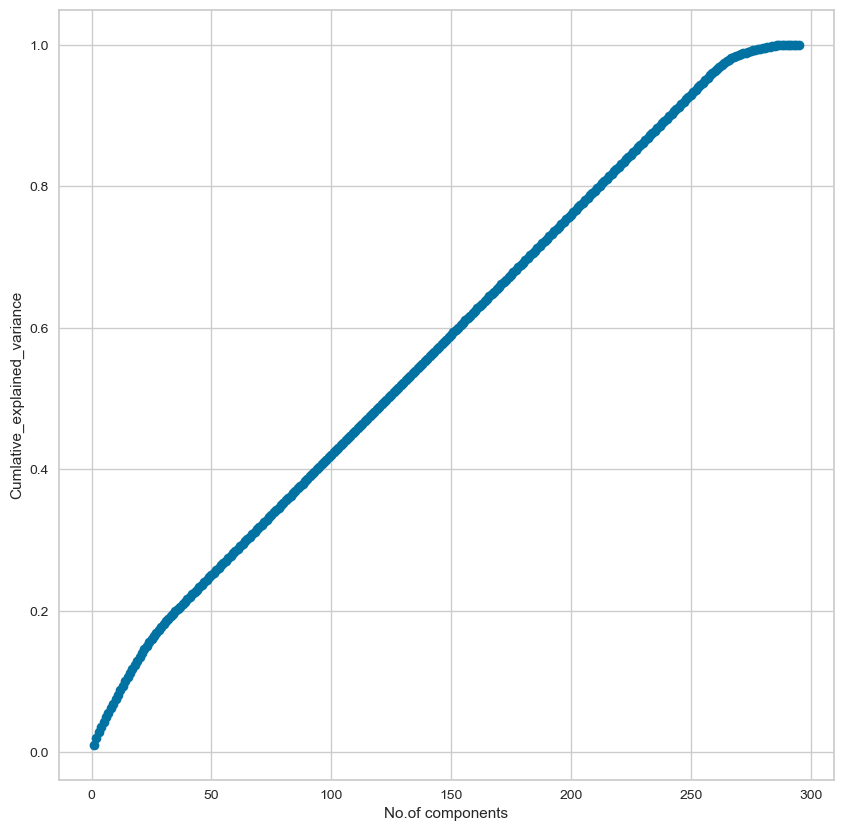

In [150]:
plt.plot(range(1,len(cumlative_variance) +1),cumlative_variance,marker='o',linestyle='-')
plt.xlabel('No.of components')
plt.ylabel('Cumlative_explained_variance')
plt.show()

In [151]:
## doing PCA again to check the no. of componenets
cov_mat = np.cov(df_scaled.T)

In [152]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

In [153]:
eig_val = list(eig_val)
eig_val

[3.189390387919418,
 2.742133557275455,
 2.592837744020706,
 2.0919400459396997,
 2.006401810256724,
 1.954443807206176,
 1.9474868463886121,
 1.9007971755241613,
 1.8910062565192545,
 1.8799336544589487,
 1.872796948068721,
 1.8188269320971335,
 1.8444664563312199,
 1.855094985903538,
 1.7919268554047114,
 1.7756135904021175,
 1.7194456246448788,
 1.7029012559997632,
 1.6898765059147869,
 0.00717909678511894,
 0.003915973855571773,
 0.06862682714248819,
 0.11408379432936648,
 0.12842237620638475,
 0.14216708511096687,
 0.3117972774149929,
 0.28130913980054956,
 0.2630166089464886,
 0.24346555583445972,
 0.1757745427087261,
 0.1806912963728863,
 0.23605881531013584,
 0.19234276659247176,
 0.2002947072229884,
 0.20971212946498505,
 0.2048167612974091,
 1.6304104945805638,
 1.5678806685126365,
 1.5596448884395808,
 1.4824633836231556,
 1.4459650256778127,
 0.3292407293524488,
 0.32112059165604917,
 0.354077711901492,
 0.38884052967455035,
 0.5413511410198105,
 0.4628168557130717,
 0.4471

In [154]:
percentage = []

for i in eig_val:
    per = (i/np.sum(eig_val))*100
    percentage.append(per)

In [155]:
cum_sum = np.cumsum(percentage)
cum_sum

array([  1.08022205,   2.00896165,   2.8871359 ,   3.59565995,
         4.27521285,   4.93716797,   5.59676682,   6.24055224,
         6.88102155,   7.51774066,   8.15204262,   8.76806535,
         9.39277198,  10.02107842,  10.6279903 ,  11.229377  ,
        11.81174004,  12.38849963,  12.96084784,  12.96327934,
        12.96460565,  12.98784903,  13.02648834,  13.06998401,
        13.11813491,  13.22373826,  13.31901551,  13.40809722,
        13.49055713,  13.55009062,  13.61128938,  13.69124069,
        13.75638571,  13.82422399,  13.89525188,  13.96462174,
        14.51682927,  15.04785842,  15.57609818,  16.07819715,
        16.56793441,  16.67944572,  16.7882068 ,  16.90813021,
        17.03982751,  17.22317899,  17.37993151,  17.53139251,
        17.67655683,  17.67655683,  17.67655683,  17.67655683,
        17.67655683,  18.13521307,  18.5829409 ,  18.81538192,
        19.04398017,  19.29511895,  19.72509682,  20.14829765,
        20.41056515,  20.81820631,  21.10711225,  21.49

In [156]:
len(cum_sum[cum_sum<99.2])

292

## Inference

* It indicates that adding more principal components does not significantly increase the explained variance. 
* There is no multicollinearity between the independent variables.
* Thus there is no need of Principle component analysis.
* The Scree Plot shows a straight line, it suggests that each additional principal component contributes roughly the same amount of variance to the overall dataset.

## Kmeans

In [157]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [158]:
silhouette_scores = []

inertia_values = []

for i in range(2,10):
    km= KMeans(n_clusters = i , random_state=10)
    km.fit(df)
    
    silhouette_avg = silhouette_score(df, km.labels_)
    silhouette_scores.append(silhouette_avg)
    
    inertia_values.append(km.inertia_)

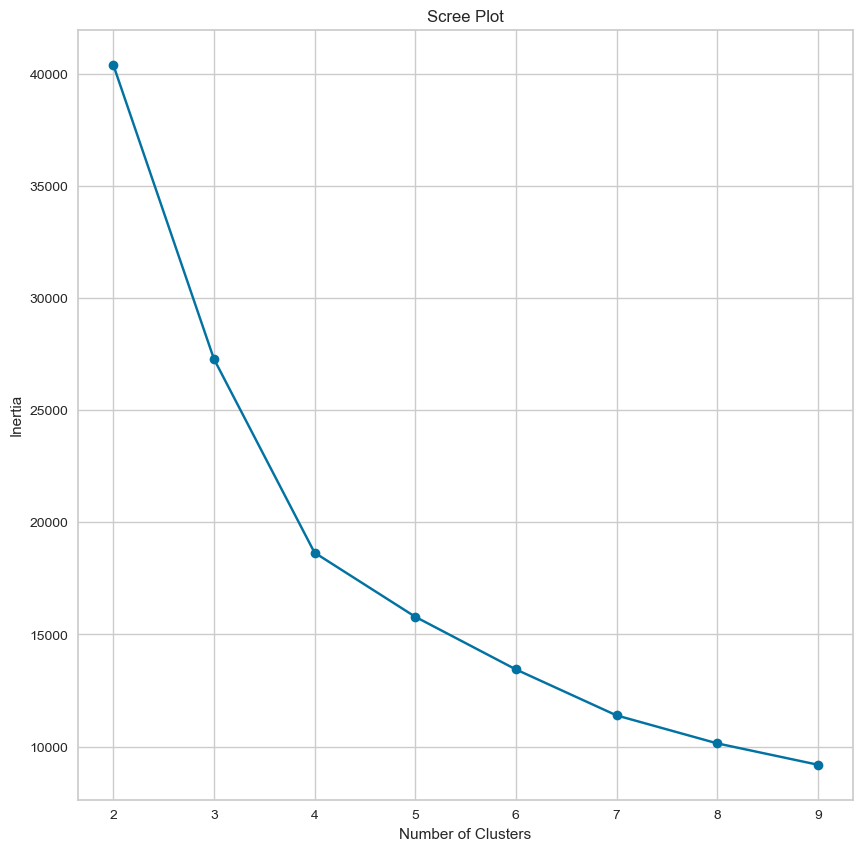

In [159]:
plt.plot(range(2,10), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.xticks(range(2,10))
plt.grid(True)
plt.show()

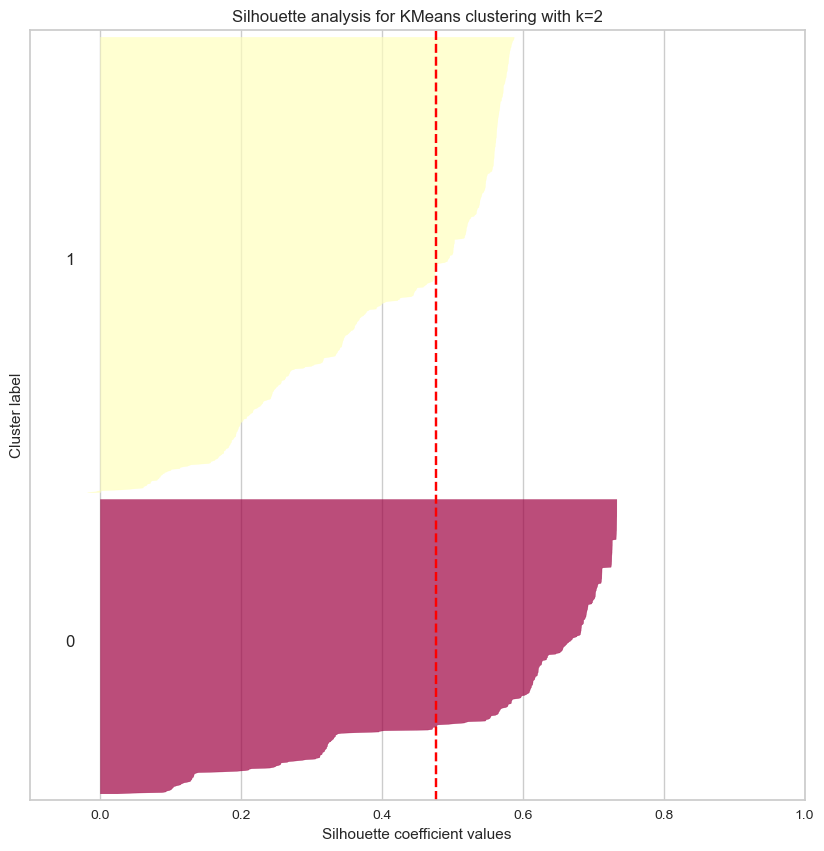

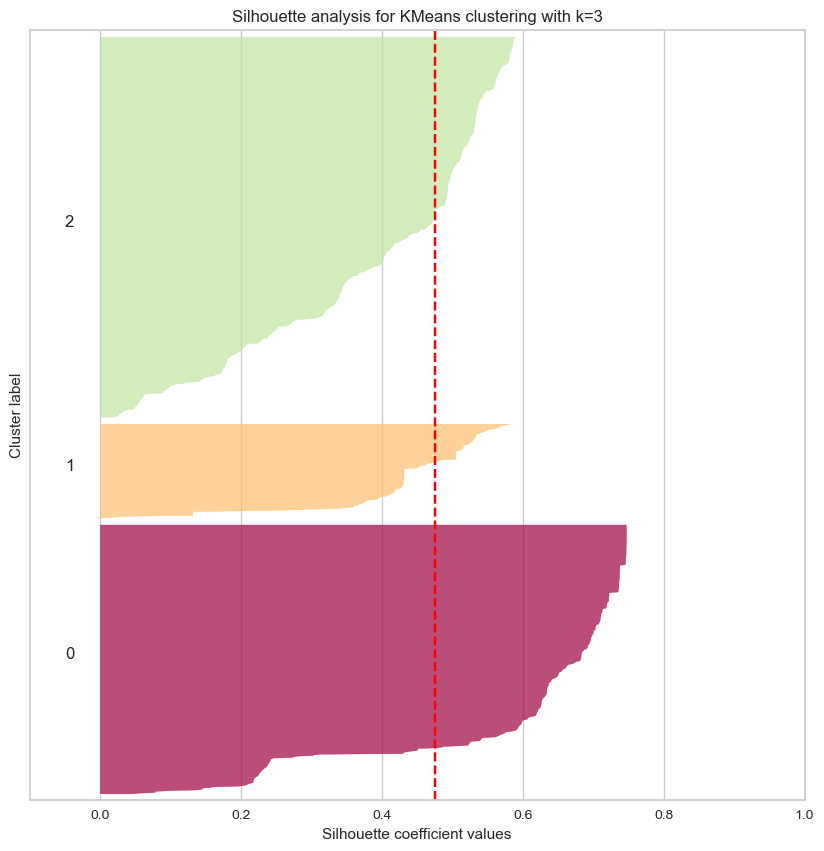

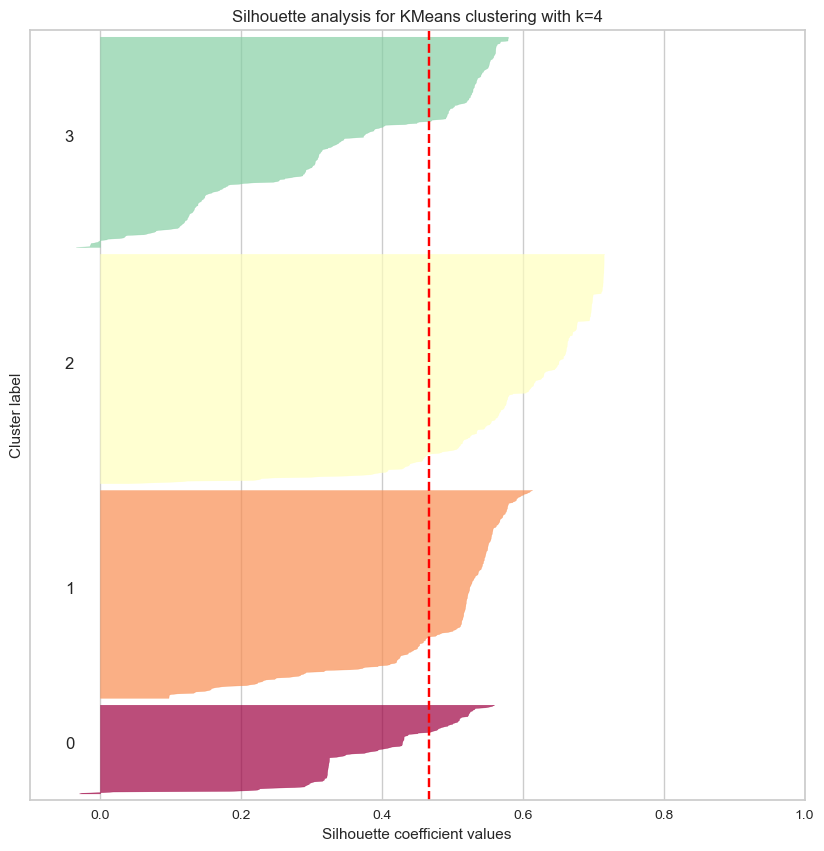

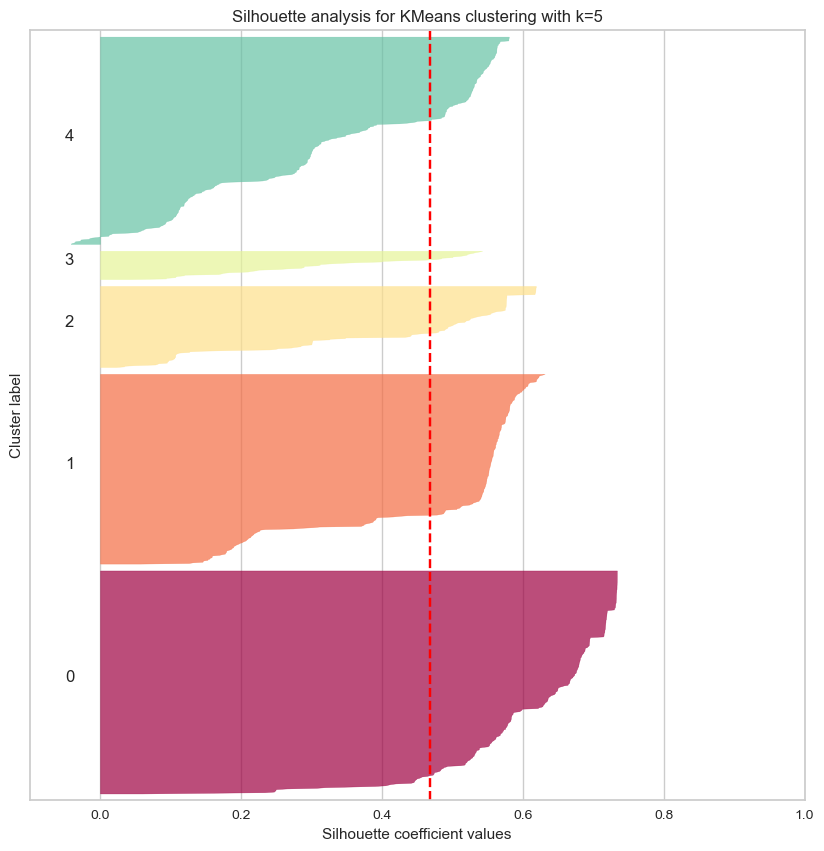

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np


silhouette_scores = []
for k in range(2,6):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df)
    
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, labels)

    fig, ax = plt.subplots()
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(df) + (k + 1) * 10])

    y_lower = 10

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.get_cmap("Spectral")(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.set_title(f"Silhouette analysis for KMeans clustering with k={k}")

plt.show()

## Inference

* Based on the analysis of the provided graphs, it appears that there are four clusters with favorable inertia offset, indicating well-defined clusters.
* The scree plot reveals an upward trend in variance explained after the forth cluster, suggesting that the optimal choice for this dataset may extend beyond three clusters.
* The silhouette_score shows k=2 , a higher silhouette score indicates better-defined clusters because of the wide area, whereas the avg silhouette_coefficient is about 0.5 , thus the clusters are not overlaped.

Cluster Centers:
[[1.21716374e+01 7.78810834e+01 7.70212766e+00 ... 6.07902736e-03
  3.03951368e-02 9.63525836e-01]
 [2.86293577e+01 7.71063445e+01 8.64462810e+00 ... 5.50964187e-02
  8.53994490e-02 8.59504132e-01]
 [1.94008938e+01 7.49536607e+01 7.33633634e+00 ... 2.40240240e-02
  5.70570571e-02 9.18918919e-01]
 [1.43608227e+01 7.69449900e+01 1.83687943e+01 ... 4.85722573e-17
  1.41843972e-02 9.85815603e-01]]


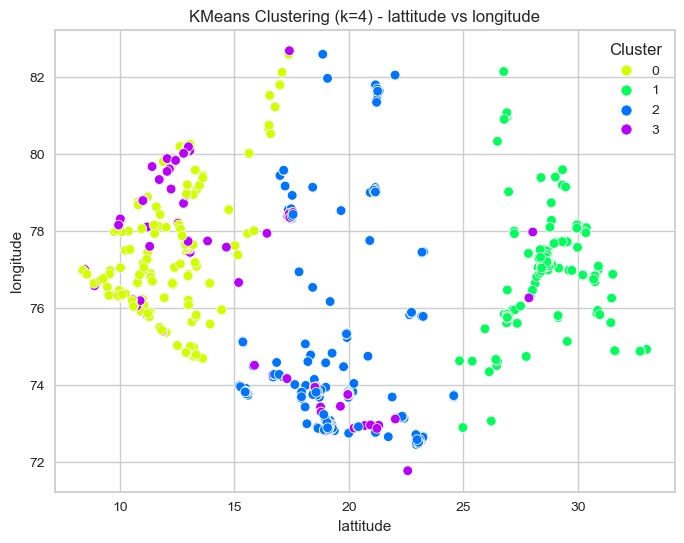

In [161]:
# Initialize KMeans model
kmeans = KMeans(n_clusters= 4 , random_state=10)

# Fit the model to the data
kmeans.fit(df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['k_cluster'] = cluster_labels

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

sns.set_style("whitegrid")
palette = sns.color_palette("hsv", len(df['k_cluster'].unique())) 

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='lattitude', y='longitude', hue='k_cluster', palette=palette, legend='full')

# Add labels and title
plt.xlabel('lattitude')
plt.ylabel('longitude')
plt.title(f"KMeans Clustering (k=4) - {'lattitude'} vs {'longitude'}")

# Show the plot
plt.legend(title='Cluster')
plt.show()

## Agglomerative Clustering

In [162]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

In [163]:
link = linkage(df,method='ward')
link

array([[7.40000000e+02, 7.43000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.63000000e+02, 1.07200000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.64000000e+02, 1.07300000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.32400000e+03, 2.32600000e+03, 1.44498781e+02, 6.61000000e+02],
       [2.32500000e+03, 2.32800000e+03, 1.67952355e+02, 7.98000000e+02],
       [2.32700000e+03, 2.32900000e+03, 2.95292428e+02, 1.16600000e+03]])

In [164]:
for i in range(2,10):
    agg = AgglomerativeClustering(n_clusters= i)
    agg_pred = agg.fit_predict(df)
    score = silhouette_score(df,agg_pred,random_state=10)
    print("Sil score of ",i,"is",score)
    

Sil score of  2 is 0.47086542884542854
Sil score of  3 is 0.46824019476723505
Sil score of  4 is 0.47627681344994505
Sil score of  5 is 0.456177395878886
Sil score of  6 is 0.4563909455408642
Sil score of  7 is 0.45540892596706056
Sil score of  8 is 0.43510504989779203
Sil score of  9 is 0.4516799421696608


In [165]:
model2 = AgglomerativeClustering(n_clusters=4)
model2.fit(df)

AgglomerativeClustering(n_clusters=4)

In [166]:
model2.labels_

array([0, 0, 0, ..., 0, 0, 3], dtype=int64)

In [167]:
df['Agg'] = model2.labels_

In [168]:
plt.rcParams['figure.figsize'] = [10,10]

<Axes: xlabel='lattitude', ylabel='longitude'>

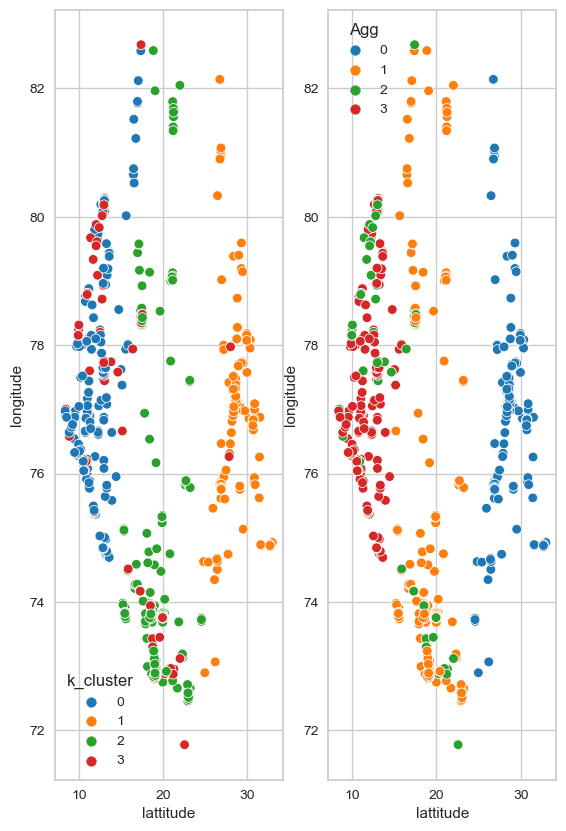

In [169]:
plt.subplot(1,3,1)

sns.scatterplot(x=df['lattitude'],y=df['longitude'],hue=df['k_cluster'],palette="tab10")

plt.subplot(1,3,2)

sns.scatterplot(x=df['lattitude'],y=df['longitude'],hue=df['Agg'],palette="tab10")


## Segment profiling

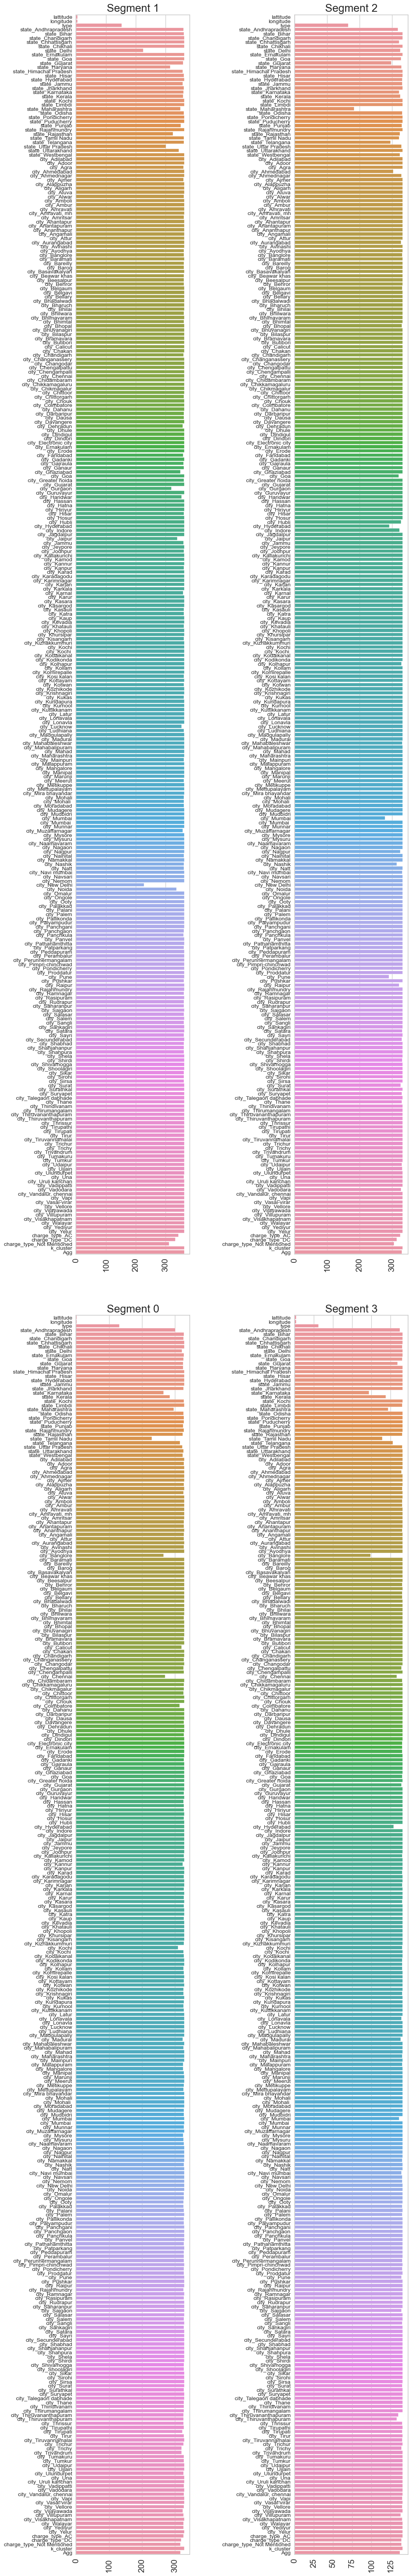

In [172]:
clusters = {}
fig = plt.figure(figsize=(12, 100))


for i, cluster in enumerate(df['k_cluster'].unique()):
    plt.subplot(int(len(df['k_cluster'].unique()) / 2 + 1), 2, i + 1)
    clust_feat_val = []
    
    for col in df.columns:
        cluster_data = df[df['k_cluster'] == cluster]
        if not cluster_data.empty:
            clust_feat_val.append(cluster_data[col].value_counts().values[0])
        else:
            clust_feat_val.append(0)  
    
    clusters[f'cluster_feature_{cluster}_count'] = clust_feat_val
    
    sns.barplot(x=clusters[f'cluster_feature_{cluster}_count'], y=list(df.columns))  
    plt.xticks(rotation=90, fontsize='15')
    plt.title(f'Segment {cluster}', fontsize='20')

fig.tight_layout(pad=5.0)
plt.show()

* Segment 0, 1,2, have about 300 clustered features which contribute to the profiling .

<Figure size 800x600 with 0 Axes>

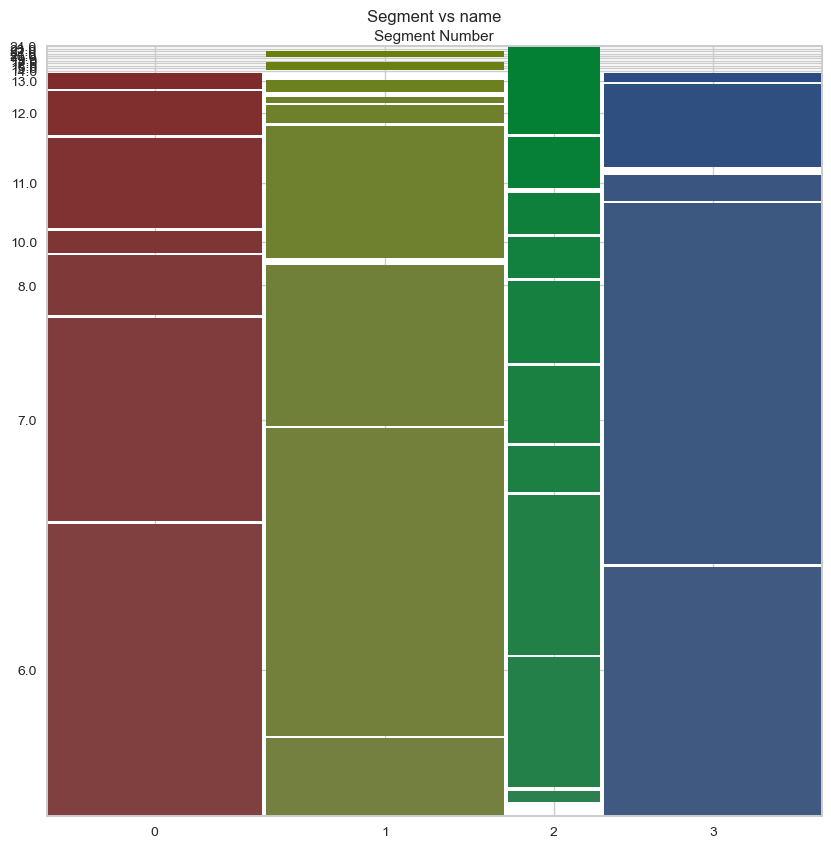

In [94]:
## Mosaic Plot for Segment Membership and Type
ctab_type = pd.crosstab(df['k_cluster'], df['type'])

plt.figure(figsize=(8, 6))
mosaic(ctab_gender.stack(), title='Segment vs name', labelizer=lambda k: '')
plt.xlabel('Segment Number')
plt.ylabel('type')
plt.show()

## Conclusion

* Maharashtra leads in EV charging stations, followed closely by Delhi, Tamil Nadu, and Karnataka, collectively hosting half of India's stations.
* New Delhi tops city counts, followed by Bengaluru, Chennai, Mumbai, and Hyderabad.
* 7 kWh and 6 KWh stations are prevalent in cluster 0 and 3 , with significant numbers also for 8 to 12 kWh variants in all clusters
* Clustering analysis reveals well-defined clusters, with four showing favorable scores,the scree plot suggests the potential for more than four clusters.
* Setting up the EV charging stations in the Eastern part of India ,and increasing the number of stations in the union territories, will increase the selling rate.
* Most of the charging type is not mentioned in the dataset, for further analysis .
* The metroplitian cities have prominant number of stations,except Surat.
* Overall, this analysis highlights regional distribution patterns and charging station capacities in India.
